In [1]:
import pandas as pd;
import numpy as np;
import json;
import matplotlib.pyplot as plt;
%matplotlib inline


In [3]:
rawJSON = json.loads("".join(open('data/keystrokes-34c38-export (7).json').readlines()))

In [3]:
def calculatePerKeyDwellTime(dataframe,DEBUG=False):
    dwell_times = {}
    for i in set(dataframe.key.unique()):
        if(DEBUG):
            print (i);
        running_average = 0;
        subset = dataframe[dataframe['key'] == i];
        if(len(dataframe[dataframe['key']==i])%2==0):
            for g in range(len(subset)-1):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            if(DEBUG):
                print ("running average: "+str(running_average));
            running_average/=len(subset);
            if(DEBUG):
                print ("running average/subset_len = "+str(running_average));
        else: # last key release not recorded
            for g in range(len(subset)-2):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        dwell_times[i] = running_average;
        if(DEBUG):
            print (" ");
    return dwell_times;    


def calculateFlightTime(dataframe):
#     time between release and next key press
    flight_times = [];
    index_of_releases = ((dataframe[dataframe['action']=='RELEASED']).index.tolist());
    range_of_events = list(range(index_of_releases[0], index_of_releases[-1]));
    index_of_presses = list(set(range_of_events).difference(index_of_releases));
    try:
        first_press = index_of_presses[0];
#         print (index_of_presses)
    except:
        return False;
    while (index_of_presses[0]<index_of_releases[0]):
        del index_of_releases[0];
    while(len(index_of_presses)>0):
        flight_times.append((float(dataframe['timestamp'].iloc[index_of_presses[0]]) - float(dataframe['timestamp'].iloc[index_of_releases[0]])));
        del index_of_releases[0]
        del index_of_presses[0]
    return flight_times;

In [4]:
keystrokes=pd.DataFrame.from_dict(rawJSON)
obj = (keystrokes[:1]['samples'])
keystrokes=pd.DataFrame.from_dict(rawJSON['samples']).T

In [5]:
# Just the new records
lorem_ipsum = keystrokes.iloc[22:]

In [6]:
lorem_ipsum

,keystrokes,subject
-KXcfQLt3sL8sFQLSA25,"[[""1480298596527 Shift PRESSED"",""1480298597351...",An Dee
-KXchppS19K4bkiMZIho,"[[""1480299235028 Shift PRESSED"",""1480299235217...",Joseph Haaga


In [41]:
number_of_chars_per_observation = 20

In [44]:
andy_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[0])[0]

In [46]:
andy = pd.DataFrame([x.split(" ") for x in andy_lorem_keystrokes] , columns=['timestamp','key','event'])
joe = pd.DataFrame([x.split(" ") for x in json.loads(lorem_ipsum['keystrokes'].iloc[1])[0]] , columns=['timestamp','key','event'])

In [105]:
andy_results = [];
joe_results = [];

number_of_chars_per_observation = 17

for n in range(number_of_chars_per_observation,len(andy),number_of_chars_per_observation):
#     andy_results.append(andy[n-number_of_chars_per_observation:n].event.value_counts())
    print(andy[n-number_of_chars_per_observation:n].event.value_counts())
#     joe_results.append(joe[n-number_of_chars_per_observation:n].event.value_counts())

PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8
Name: event, dtype: int64
RELEASED    9
PRESSED     8
Name: event, dtype: int64
PRESSED     9
RELEASED    8


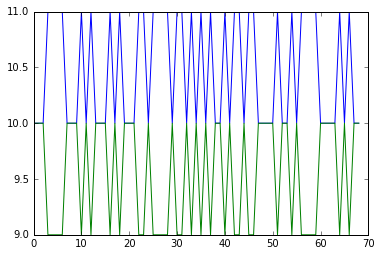

In [92]:
from matplotlib import pyplot
pyplot.plot(andy_results)

In [100]:
matched = 0;
for k in andy_results:
    if k['RELEASED'] == k['PRESSED']:
        matched+=1;
print ((str(matched/len(andy_results)*100))+"% match for Andy")

53.62318840579711% match for Andy


In [102]:
matched = 0;
for k in joe_results:
    if k['RELEASED'] == k['PRESSED']:
        matched+=1;
print ((str(matched/len(joe_results)*100))+"% match for Joe")

55.072463768115945% match for Joe


In [103]:
# BATCH PROCESS PARAMETER SEARCH

for g in range(16,35,1):
    number_of_chars_per_observation = g;
    andy_results = [];
    joe_results = [];
    print (str(g)+" characters:")
    for n in range(number_of_chars_per_observation,len(andy),number_of_chars_per_observation):
        andy_results.append(andy[n-number_of_chars_per_observation:n].event.value_counts())
        joe_results.append(joe[n-number_of_chars_per_observation:n].event.value_counts())

    matched = 0;
    for k in andy_results:
        if k['RELEASED'] == k['PRESSED']:
            matched+=1;
    print (" "+(str(matched/len(andy_results)*100))+"% match for Andy")


    matched = 0;
    for k in joe_results:
        if k['RELEASED'] == k['PRESSED']:
            matched+=1;
    print (" "+(str(matched/len(joe_results)*100))+"% match for Joe")
    print ( " " )

16 characters:
 55.81395348837209% match for Andy
 54.65116279069767% match for Joe
 
17 characters:
 0.0% match for Andy
 0.0% match for Joe
 
18 characters:
 51.31578947368421% match for Andy
 36.84210526315789% match for Joe
 
19 characters:
 0.0% match for Andy
 0.0% match for Joe
 
20 characters:
 53.62318840579711% match for Andy
 55.072463768115945% match for Joe
 
21 characters:
 0.0% match for Andy
 0.0% match for Joe
 
22 characters:
 51.61290322580645% match for Andy
 53.2258064516129% match for Joe
 
23 characters:
 0.0% match for Andy
 0.0% match for Joe
 
24 characters:
 38.59649122807017% match for Andy
 43.859649122807014% match for Joe
 
25 characters:
 0.0% match for Andy
 0.0% match for Joe
 
26 characters:
 54.71698113207547% match for Andy
 50.943396226415096% match for Joe
 
27 characters:
 0.0% match for Andy
 0.0% match for Joe
 
28 characters:
 57.14285714285714% match for Andy
 44.89795918367347% match for Joe
 
29 characters:
 0.0% match for Andy
 0.0% match 

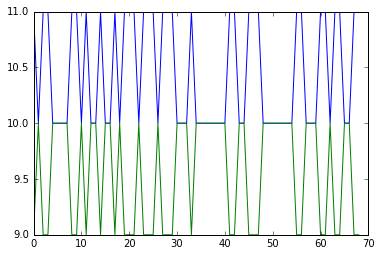

In [91]:
pyplot.plot(joe_results)

In [109]:
len(joe[joe['key']=='Backspace'])

52

In [111]:
len(andy[andy['key']=='Backspace'])

14

In [114]:
(andy['key'].value_counts() - joe['key'].value_counts()).sort_values()

Backspace   -38
T            -6
Spacebar     -6
O            -6
Y            -4
A            -4
I            -2
X            -2
W            -2
V            -2
S            -2
H            -2
M            -2
D            -2
E            -2
N             0
Q             0
R             0
Shift         0
P             0
L             0
'             0
J             0
G             0
F             0
B             0
9             0
6             0
5             0
1             0
0             0
/             0
.             0
,             0
K             0
C             2
Z             2
U             4
Name: key, dtype: int64